In [23]:
import json
import requests as req
import random
import seaborn as sns
import pandas as pd
import math as math
import time
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy

In [24]:
api_key: "3d703e90ec71e04fb5e18aba8aca0b25"
    

In [25]:
location_data = pd.DataFrame()
location_data['lat_values'] = [np.random.uniform(-90,90) for x in range(1500)]
location_data['lng_values'] = [np.random.uniform(-180, 180) for x in range(1500)]

location_data.head()#check

,lat_values,lng_values
0,6.967627,-173.186671
1,-43.360887,-100.741898
2,9.899485,57.972010
3,-27.398594,154.792986
4,29.354227,-36.159877


In [26]:
location_data['city'] = ""
location_data['country'] = ""

count = 0
for index, row in location_data.iterrows():
    near_city = citipy.nearest_city(row['lat_values'], row['lng_values']).city_name
    near_country = citipy.nearest_city(row['lat_values'], row['lng_values']).country_code
    location_data.set_value(index,"city",near_city)
    location_data.set_value(index,"country",near_country)
location_data.head()#check

/Users/DocsMac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Users/DocsMac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


,lat_values,lng_values,city,country
0,6.967627,-173.186671,vaitupu,wf
1,-43.360887,-100.741898,castro,cl
2,9.899485,57.972010,bargal,so
3,-27.398594,154.792986,gold coast,au
4,29.354227,-36.159877,ribeira grande,pt


In [27]:
len(location_data)


1500

In [28]:
location_data=location_data.drop_duplicates(['city','country'],keep = "first")


In [29]:
location_data['Temp'] = ""
location_data['Humidity'] = ""
location_data['Cloudiness'] = ""
location_data['Wind Speed'] = ""
location_data["Lat"] =""
location_data["Longitude"] =""

In [30]:
sample_size = 500

target_url = 'http://api.openweathermap.org/data/2.5/weather?q='
units = 'imperial'

In [31]:
location_data.head()#check


,lat_values,lng_values,city,country,Temp,Humidity,Cloudiness,Wind Speed,Lat,Longitude
0,6.967627,-173.186671,vaitupu,wf,,,,,,
1,-43.360887,-100.741898,castro,cl,,,,,,
2,9.899485,57.972010,bargal,so,,,,,,
3,-27.398594,154.792986,gold coast,au,,,,,,
4,29.354227,-36.159877,ribeira grande,pt,,,,,,


In [32]:
record = 0
for index, row in location_data.iterrows():
    city_name = row['city']
    country_code = row['country']
    url = target_url + city_name + ',' + country_code + '&units=' + units + '&APPID' + api_key
    print (url)
    try: 
        weather_response = req.get(url)
        weather_json = weather_response.json()
        latitude = weather_json["coord"]["lat"]
        longitude = weather_json["coord"]["lon"]
        temp = weather_json["main"]["temp"]
        humidity = weather_json["main"]["humidity"]
        cloud = weather_json["clouds"]["all"]
        wind = weather_json["wind"]["speed"]
        location_data.set_value(index,"Temp", temp)
        location_data.set_value(index,"Humidity",humidity)
        location_data.set_value(index,"Wind Speed", wind)
        location_data.set_value(index,"Cloudiness",cloud)
        location_data.set_value(index,"Lat", latitude)
        location_data.set_value(index,"Longitude",longitude)
        print("Retrieved data for %s, %s" % (city_name, country_code))
    except:
        print("No data for %s, %s" % (city_name,country_code))
    record += 1
    if record % 59 == 0:
        time.sleep(60)

NameError: name 'api_key' is not defined

In [33]:
location_data.head(20)#check


,lat_values,lng_values,city,country,Temp,Humidity,Cloudiness,Wind Speed,Lat,Longitude
0,6.967627,-173.186671,vaitupu,wf,,,,,,
1,-43.360887,-100.741898,castro,cl,,,,,,
2,9.899485,57.972010,bargal,so,,,,,,
3,-27.398594,154.792986,gold coast,au,,,,,,
4,29.354227,-36.159877,ribeira grande,pt,,,,,,
5,-42.339722,107.891089,busselton,au,,,,,,
6,16.746410,-150.417322,hilo,us,,,,,,
7,5.134296,86.132150,kalmunai,lk,,,,,,
8,74.560722,-104.684042,yellowknife,ca,,,,,,
9,-34.414644,-117.789149,rikitea,pf,,,,,,


In [34]:
len(location_data)


643

In [35]:
location_data.to_csv("weatherpy_data.csv", encoding="utf-8", index=False)


In [36]:
location_data['Lat'] = pd.to_numeric(location_data['Lat'], errors = 'coerce')
location_data['Temp'] = pd.to_numeric(location_data['Temp'], errors = 'coerce')
location_data['Humidity'] = pd.to_numeric(location_data['Humidity'], errors = 'coerce')
location_data['Wind Speed'] = pd.to_numeric(location_data['Wind Speed'], errors = 'coerce')
location_data['Cloudiness'] = pd.to_numeric(location_data['Cloudiness'], errors = 'coerce')

In [37]:
location_data.head()#check


,lat_values,lng_values,city,country,Temp,Humidity,Cloudiness,Wind Speed,Lat,Longitude
0,6.967627,-173.186671,vaitupu,wf,NaN,NaN,NaN,NaN,NaN,
1,-43.360887,-100.741898,castro,cl,NaN,NaN,NaN,NaN,NaN,
2,9.899485,57.972010,bargal,so,NaN,NaN,NaN,NaN,NaN,
3,-27.398594,154.792986,gold coast,au,NaN,NaN,NaN,NaN,NaN,
4,29.354227,-36.159877,ribeira grande,pt,NaN,NaN,NaN,NaN,NaN,


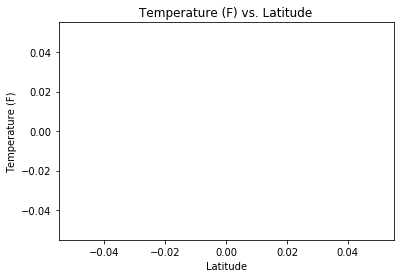

In [38]:
x= location_data["Lat"]
y= location_data["Temp"]
plt.scatter (x,y, edgecolor = 'black')
plt.title('Temperature (F) vs. Latitude')
plt.ylabel("Temperature (F)")
plt.xlabel('Latitude')
plt.show()


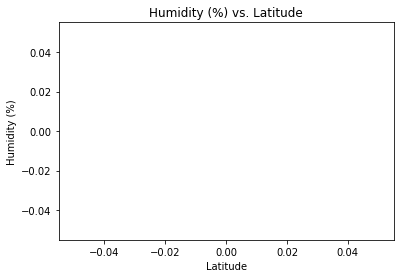

In [39]:
x= location_data["Lat"]
y= location_data["Humidity"]
plt.scatter (x,y,edgecolor = 'black')
plt.title('Humidity (%) vs. Latitude')
plt.ylabel("Humidity (%)")
plt.xlabel('Latitude')
plt.show()

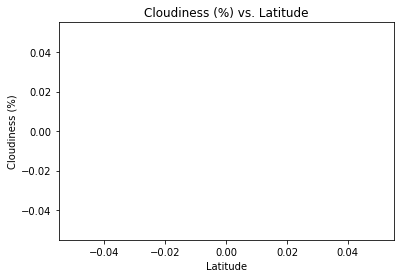

In [40]:
x= location_data["Lat"]
y= location_data["Cloudiness"]
plt.scatter (x,y,edgecolor = 'black')
plt.title('Cloudiness (%) vs. Latitude')
plt.ylabel("Cloudiness (%)")
plt.xlabel('Latitude')
plt.show()

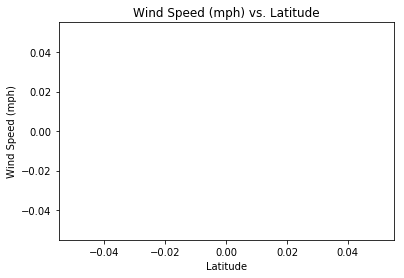

In [41]:
x= location_data["Lat"]
y= location_data["Wind Speed"]
plt.scatter (x,y, edgecolor = 'black')
plt.title('Wind Speed (mph) vs. Latitude')
plt.ylabel("Wind Speed (mph)")
plt.xlabel('Latitude')
plt.show()